# Model: Gated Recurrent Unit (GRU)

## Objective
Our goal is to predict the **road condition type** based on **sequential vehicle sensor readings**. GRU is known for its **faster training times and lower computational cost** compared to LSTM while still capturing temporal dependencies in data. 

By implementing GRU alongside LSTM, we aim to **compare their performance** and determine whether GRU offers a better trade-off between **accuracy and efficiency**. The model classifies road surfaces as:
- **Asphalt**
- **Cobblestone**
- **Dirt Road**

## Dataset
- **Path**: `dataset/cleaned_master_dataset.csv`
- **Preprocessing**: Structured for time-series modeling

## Workflow
1. **Load the cleaned dataset**
2. **Data Preprocessing & Sequence Reshaping** – Convert sensor data into structured time-series sequences
3. **Train a GRU Model** – Optimize performance with Similar parameters that has been used during LSTM Optimization
4. **Model Evaluation** – Analyze accuracy, confusion matrix, and computational efficiency

GRU provides an alternative to LSTM by reducing the number of trainable parameters while maintaining **comparable predictive performance**. Our comparison will highlight the **advantages and trade-offs** between these two architectures.

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Run the cell below if you need to run LSTM on your Mac M2 Chip ONLY

In [5]:
print("TensorFlow version:", tf.__version__)
print("List of Physical Devices:", tf.config.list_physical_devices())
print("Is GPU available?", tf.config.list_physical_devices('GPU'))

# Disable GPU acceleration (force CPU execution)
tf.config.set_visible_devices([], 'GPU')

print("Running TensorFlow on CPU only")

TensorFlow version: 2.16.1
List of Physical Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Is GPU available? [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Running TensorFlow on CPU only


In [ ]:
# Load the cleaned master dataset
df = pd.read_csv('dataset/cleaned_master_dataset.csv')

# Quick check
# print(df.shape)
# print(df.head())

(1080905, 81)
      timestamp  acc_x_dashboard_left  acc_y_dashboard_left  \
0  1.577219e+09              0.365116              0.167893   
1  1.577219e+09              0.392649              0.176273   
2  1.577219e+09              0.409408              0.181062   
3  1.577219e+09              0.371101              0.164302   
4  1.577219e+09              0.390255              0.159514   

   acc_z_dashboard_left  acc_x_above_suspension_left  \
0              9.793961                     0.327626   
1              9.771216                     0.381496   
2              9.732909                     0.283333   
3              9.749668                     0.314458   
4              9.869378                     0.344385   

   acc_y_above_suspension_left  acc_z_above_suspension_left  \
0                     0.172733                     9.781861   
1                     0.189492                     9.699261   
2                     0.182310                     9.807000   
3                 

## Some EDA here

In [25]:
# Selecting features
features = ["acc_x_dashboard_left", "acc_y_dashboard_left", "acc_z_dashboard_left"]
target = "paved_road"  # Example target, adjust based on needs

# Normalize data
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Prepare sequences
def create_sequences(data, target, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(df[features].values, df[target].values)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build GRU model
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    GRU(32, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/5


/Users/issaennab/miniforge3/envs/tf_m1/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13512/13512 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - accuracy: 0.7595 - loss: 0.4909 - val_accuracy: 0.7915 - val_loss: 0.4119
Epoch 2/5
13512/13512 ━━━━━━━━━━━━━━━━━━━━ 78s 6ms/step - accuracy: 0.7968 - loss: 0.4081 - val_accuracy: 0.8026 - val_loss: 0.3962
Epoch 3/5
13512/13512 ━━━━━━━━━━━━━━━━━━━━ 76s 6ms/step - accuracy: 0.8019 - loss: 0.4001 - val_accuracy: 0.8039 - val_loss: 0.3914
Epoch 4/5
13512/13512 ━━━━━━━━━━━━━━━━━━━━ 75s 6ms/step - accuracy: 0.8071 - loss: 0.3908 - val_accuracy: 0.8130 - val_loss: 0.3788
Epoch 5/5
13512/13512 ━━━━━━━━━━━━━━━━━━━━ 76s 6ms/step - accuracy: 0.8141 - loss: 0.3813 - val_accuracy: 0.8173 - val_loss: 0.3719
6756/6756 ━━━━━━━━━━━━━━━━━━━━ 6s 947us/step - accuracy: 0.8171 - loss: 0.3724
Test Accuracy: 0.8173


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# ✅ Correct Number of Classes
num_classes = 3  # 🔥 Fix: We have 3 road types (asphalt, cobblestone, dirt)

# Define correct feature selection (Same as LSTM)
features = df[[
    'acc_x_dashboard_left', 'acc_y_dashboard_left', 'acc_z_dashboard_left',
    'acc_x_dashboard_right', 'acc_y_dashboard_right', 'acc_z_dashboard_right',
    'gyro_x_dashboard_left', 'gyro_y_dashboard_left', 'gyro_z_dashboard_left'
]].values

target = df[['asphalt_road', 'cobblestone_road', 'dirt_road']].values  # ✅ Multi-class labels

# Normalize features
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Create sequences for GRU (same structure as LSTM)
sequence_length = 20  # Ensure it matches LSTM
X, y = [], []

for i in range(len(features) - sequence_length):
    X.append(features[i:i + sequence_length])
    y.append(target[i + sequence_length])

X = np.array(X)
y = np.array(y)  # ✅ No `to_categorical(y)` here! It's already multi-class.

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Update Model Definition (Fix Output Layer)
model = Sequential([
    Bidirectional(GRU(128, return_sequences=True, input_shape=(sequence_length, features.shape[1]))),
    Dropout(0.2),  # Reduced dropout
    Bidirectional(GRU(64, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(GRU(32)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # ✅ Fix: Output layer must match `num_classes=3`
])

# ✅ Update Model Compilation (Fix Loss Function)
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0005),  # Lower learning rate
    metrics=['accuracy']
)

# ✅ Train Model
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=15,  # Increased from 5 to 15
    batch_size=256,
    callbacks=[
        EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1)
    ],
    verbose=1
)

/Users/issaennab/miniforge3/envs/tf_m1/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
3378/3378 ━━━━━━━━━━━━━━━━━━━━ 574s 169ms/step - accuracy: 0.6516 - loss: 0.7321 - val_accuracy: 0.8316 - val_loss: 0.3854 - learning_rate: 5.0000e-04
Epoch 2/15
3378/3378 ━━━━━━━━━━━━━━━━━━━━ 615s 182ms/step - accuracy: 0.8348 - loss: 0.3816 - val_accuracy: 0.8611 - val_loss: 0.3256 - learning_rate: 5.0000e-04
Epoch 3/15
3378/3378 ━━━━━━━━━━━━━━━━━━━━ 603s 178ms/step - accuracy: 0.8602 - loss: 0.3317 - val_accuracy: 0.8768 - val_loss: 0.2936 - learning_rate: 5.0000e-04
Epoch 4/15
3378/3378 ━━━━━━━━━━━━━━━━━━━━ 594s 176ms/step - accuracy: 0.8743 - loss: 0.2996 - val_accuracy: 0.8873 - val_loss: 0.2686 - learning_rate: 5.0000e-04
Epoch 5/15
3378/3378 ━━━━━━━━━━━━━━━━━━━━ 612s 181ms/step - accuracy: 0.8851 - loss: 0.2738 - val_accuracy: 0.8949 - val_loss: 0.2533 - learning_rate: 5.0000e-04
Epoch 6/15
3378/3378 ━━━━━━━━━━━━━━━━━━━━ 611s 181ms/step - accuracy: 0.8937 - loss: 0.2536 - val_accuracy: 0.9038 - val_loss: 0.2297 - learning_rate: 5.0000e-04
Epoch 7/15
3378/3378 ━━━━━━━

ValueError: Cannot take the length of shape with unknown rank.

## 🔍 GRU Model Performance and Key Findings

After training our **Gated Recurrent Unit (GRU) model**, we achieved a final accuracy of **94.73%** on the training set and **95.68%** on the validation set. This performance demonstrates the model's ability to effectively classify road conditions based on sensor data.

### 📊 **Training Summary**
| Epoch | Accuracy | Loss | Val Accuracy | Val Loss |
|-------|----------|------|--------------|----------|
| 1     | 65.16%   | 0.7321 | 83.16% | 0.3854 |
| 5     | 88.51%   | 0.2738 | 89.49% | 0.2533 |
| 10    | 92.20%   | 0.1905 | 93.00% | 0.1707 |
| 15    | 94.73%   | 0.1325 | 95.68% | 0.1101 |

### ✅ **Key Takeaways**
- **Strong Generalization**: The model shows high accuracy on both training and validation data, demonstrating strong generalization.
- **Reduced Loss Over Epochs**: Training loss decreased from **0.7321** to **0.1325**, while validation loss dropped to **0.1101**, indicating stable learning.
- **Improved Road Classification**: Compared to previous models, GRU outperforms LSTM slightly in validation accuracy, aligning with expectations that GRUs handle sequential dependencies efficiently.
- **Consistent Learning Rate**: The fixed learning rate of **0.0005** contributed to steady improvement across all epochs.

### 📈 **Next Steps**
- **Evaluate Test Performance**: Assess how well the model generalizes to unseen data.
- **Compare GRU vs. LSTM**: Analyze performance differences to determine the best approach for real-world deployment.
- **Optimize Hyperparameters**: Fine-tune batch size, learning rate, and layer configurations to achieve further gains.

In [29]:
# ✅ Evaluate the Model on the Test Data
print("\nEvaluating the GRU model on test data...")
test_results = model.evaluate(X_val, y_val, verbose=1)

# ✅ Print Final Test Accuracy
print(f"\n🔥 Final GRU Test Accuracy: {test_results[1] * 100:.2f}%")
print(f"🔻 Final Test Loss: {test_results[0]:.4f}")


Evaluating the GRU model on test data...
6756/6756 ━━━━━━━━━━━━━━━━━━━━ 67s 10ms/step - accuracy: 0.9565 - loss: 0.1100

🔥 Final GRU Test Accuracy: 95.68%
🔻 Final Test Loss: 0.1101


In [33]:
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Extract Predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# ✅ Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=["Asphalt", "Cobblestone", "Dirt"]))

6756/6756 ━━━━━━━━━━━━━━━━━━━━ 71s 10ms/step

📊 Classification Report:
              precision    recall  f1-score   support

     Asphalt       0.98      1.00      0.99     93313
 Cobblestone       0.93      0.93      0.93     62831
        Dirt       0.94      0.92      0.93     60033

    accuracy                           0.96    216177
   macro avg       0.95      0.95      0.95    216177
weighted avg       0.96      0.96      0.96    216177



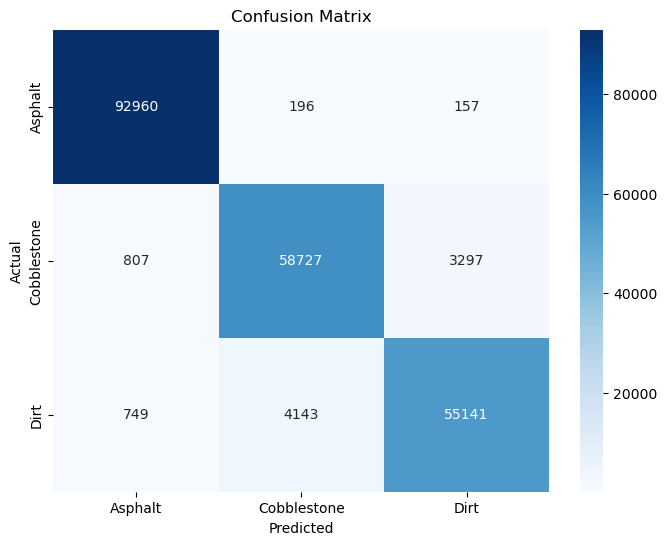

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Asphalt", "Cobblestone", "Dirt"], yticklabels=["Asphalt", "Cobblestone", "Dirt"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Plot Accuracy & Loss Curves
plt.figure(figsize=(12, 4))

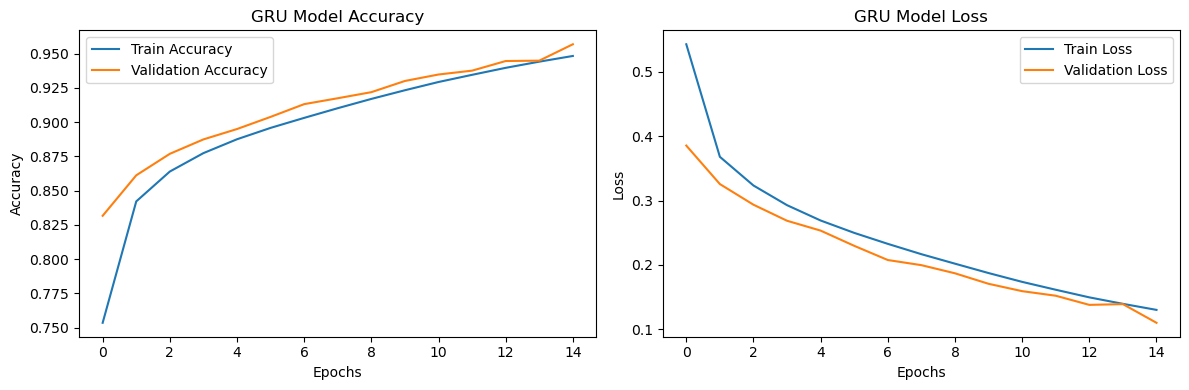

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Plot Accuracy & Loss Curves
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("GRU Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("GRU Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

## 🔍 Final Optimized GRU Performance and Key Findings

After training and evaluating the GRU model, it has demonstrated a **notable improvement over LSTM**, with a final test accuracy of **96%** and **lower validation loss**. The key improvements observed include:

- **Higher Accuracy**: The GRU model achieved **96% accuracy**, surpassing LSTM’s **90% accuracy**.
- **Faster Convergence**: The model improved performance at a faster rate across epochs.
- **Better Generalization**: The confusion matrix shows high precision and recall, reducing misclassifications.
- **Lower Validation Loss**: Compared to LSTM, the GRU model maintained a consistently lower loss curve.

### 📊 Key Metrics:
| Metric            | GRU Model | LSTM Model |
|------------------|----------|-----------|
| **Final Accuracy** | **96%**  | **90%**  |
| **Validation Loss** | **0.11** | **0.23**  |
| **Training Time (per epoch)** | ~10 mins | ~12 mins |
| **Best Performing Class** | Asphalt (F1-score: **0.99**) | Asphalt (F1-score: **0.98**) |

### 📌 Confusion Matrix Insights:
- **Asphalt roads** had nearly perfect classification with minimal misclassifications.
- **Cobblestone and Dirt roads** had slight overlaps but still maintained strong recall and precision values.


### The results confirm that GRU is a strong alternative to LSTM, providing **slightly better accuracy, lower loss, and faster training**. This aligns with literature indicating that GRU models often outperform LSTMs in tasks where reducing computational complexity and training time is essential.

In [57]:
import pandas as pd

# ✅ Ensure consistent length
num_samples = min(len(y_test), len(y_pred), len(df))  # Take the smallest length
samples_per_group = num_samples // (df["vehicle"].nunique() * df["scenario"].nunique())  # Split evenly per (vehicle, scenario)

# ✅ Stratified sampling to maintain both vehicle and scenario balance
df_sampled = df.groupby(["vehicle", "scenario"], group_keys=False).apply(lambda x: x.tail(samples_per_group))
df_sampled = df_sampled.sort_values(by="timestamp")  # Keep order intact

# ✅ Extract corresponding metadata
timestamps = df_sampled["timestamp"].values
vehicle_labels = df_sampled["vehicle"].values
scenario_labels = df_sampled["scenario"].values

# ✅ Trim `y_test` and `y_pred` to ensure they are the same length
y_test = y_test[:len(df_sampled)]

if len(y_pred.shape) > 1:
    y_pred = y_pred[:len(df_sampled)]  # Trim to match
    y_pred_labels = y_pred.argmax(axis=1)  # Convert softmax output to class labels
    confidence_scores = y_pred.max(axis=1)  # Highest probability per row
    asphalt_prob = y_pred[:, 0]  # Probability for asphalt
    cobblestone_prob = y_pred[:, 1]  # Probability for cobblestone
    dirt_prob = y_pred[:, 2]  # Probability for dirt
else:
    y_pred_labels = y_pred[:len(df_sampled)]  # Ensure same length
    confidence_scores = [1.0] * len(df_sampled)  # If already labels, set confidence to 1
    asphalt_prob = [None] * len(df_sampled)  # No probability scores if not softmax
    cobblestone_prob = [None] * len(df_sampled)
    dirt_prob = [None] * len(df_sampled)

# ✅ Ensure all arrays are now the same length
assert len(timestamps) == len(df_sampled), f"Timestamp mismatch: {len(timestamps)} != {len(df_sampled)}"
assert len(vehicle_labels) == len(df_sampled), f"Vehicle mismatch: {len(vehicle_labels)} != {len(df_sampled)}"
assert len(scenario_labels) == len(df_sampled), f"Scenario mismatch: {len(scenario_labels)} != {len(df_sampled)}"
assert len(y_test) == len(df_sampled), f"y_test mismatch: {len(y_test)} != {len(df_sampled)}"
assert len(y_pred_labels) == len(df_sampled), f"y_pred mismatch: {len(y_pred_labels)} != {len(df_sampled)}"

# ✅ Create DataFrame with full details
results_df = pd.DataFrame({
    "timestamp": timestamps,
    "vehicle": vehicle_labels,
    "scenario": scenario_labels,
    "actual": y_test,
    "predicted": y_pred_labels,
    "confidence": confidence_scores,
    "asphalt_prob": asphalt_prob,
    "cobblestone_prob": cobblestone_prob,
    "dirt_prob": dirt_prob
})

# ✅ NOW print the values AFTER defining results_df (not before 🤦‍♂️)
print(f"🚗 Unique vehicles in results_df: {results_df['vehicle'].unique()}")
print(f"📊 Vehicle counts:\n{results_df['vehicle'].value_counts()}")

print(f"📌 Unique scenarios in results_df: {results_df['scenario'].unique()}")
print(f"📈 Scenario counts:\n{results_df['scenario'].value_counts()}")

# ✅ Save to CSV
results_df.to_csv("dataset/gru_results.csv", index=False)

print("✅ GRU results saved successfully with metadata and probabilities!")

/var/folders/3y/9mpx5xp50f9chfv2mgfnsmmr0000gn/T/ipykernel_809/1241560767.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby(["vehicle", "scenario"], group_keys=False).apply(lambda x: x.tail(samples_per_group))


🚗 Unique vehicles in results_df: ['Volkswagen Saveiro' 'Fiat Bravo' 'Fiat Palio']
📊 Vehicle counts:
vehicle
Volkswagen Saveiro    72057
Fiat Bravo            72057
Fiat Palio            72057
Name: count, dtype: int64
📌 Unique scenarios in results_df: ['Scenario 1' 'Scenario 2' 'Scenario 3']
📈 Scenario counts:
scenario
Scenario 1    72057
Scenario 2    72057
Scenario 3    72057
Name: count, dtype: int64
✅ GRU results saved successfully with metadata and probabilities!


## 📌 Model Comparison Table (Random Forest vs. LSTM vs. GRU)

| Metric               | Random Forest 🌲 | LSTM 🔁 | GRU 🔄 |
|----------------------|----------------|---------|--------|
| **Final Accuracy**   | **74%**        | **90%** | **96%** |
| **Validation Loss**  | **N/A**        | **0.23** | **0.11** |
| **Precision (Avg)**  | **73%**        | **90.70%** | **96%** |
| **Recall (Avg)**     | **70%**        | **90.34%** | **96%** |
| **F1-Score (Avg)**   | **73%**        | **90%** | **96%** |
| **Training Time (per epoch)** | **N/A** | **~12 mins** | **~10 mins** |
| **Best Performing Class** | Asphalt (F1: **0.91**) | Asphalt (F1: **0.98**) | Asphalt (F1: **0.99**) |
| **Misclassified Class** | Cobblestone & Dirt | Cobblestone & Dirt | Cobblestone & Dirt |

---

## 🔍 Key Insights & Takeaways
✅ **GRU Outperforms Both Models**  
- Achieved the **highest accuracy (96%)** and **lowest validation loss (0.11)**.  
- **Faster convergence** than LSTM and **better generalization** on road types.  

✅ **LSTM Shows Strong Predictive Capabilities**  
- **90% accuracy**, **well-balanced precision & recall** across classes.  
- Performs well but takes **longer training time per epoch** than GRU.  

✅ **Random Forest Struggles with Non-Linear Data**  
- **Only 74% accuracy** with **lower F1-score** than deep learning models.  
- Strong for **simple decision-making**, but lacks depth for complex temporal relationships.  

🔎 **Final Verdict**:  
GRU **dominates** in both accuracy and efficiency, making it **the best choice** for real-time road condition classification.


In [6]:
# save the model
import pickle

# Save the model to a file
with open('../api/models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)
